In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

- edge detection

gradient를 통해 이미지에서 벡터값(크기와 방향; 밝기와 밝기의 변화하는 방향)을 구해서 해당 픽셀이 edge에 얼마나 가까운지, 어느 방향인지 쉽게 알 수 있음

### Sobel & scharr filter

- Gaussian smoothing과 미분 활용
- 노이즈 많은 이미지에 적용이 효과적
- x축 미분은 수평선(수직만 남음), y축 미분은 수직선(수평만 남음)을 미분하여 경계가 사라지는 효과
- 미분 시 소실되는 표본의 정보가 많을 수 있어 'aperture_size'값 이용

<function matplotlib.pyplot.show(close=None, block=None)>

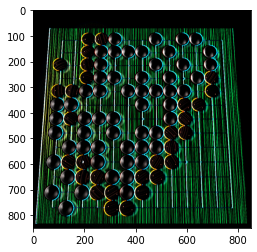

In [12]:
img = cv2.imread('/Users/sejongpyo/downloads/baduk.png')

# x = 0, y = 1
dst = cv2.Sobel(img, ddepth = -1, dx = 1, dy = 0, ksize = -1)

plt.imshow(dst)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

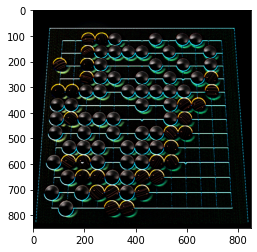

In [13]:
img = cv2.imread('/Users/sejongpyo/downloads/baduk.png')

# x = 0, y = 1
dst = cv2.Sobel(img, ddepth = -1, dx = 0, dy = 1, ksize = -1)
# ksize -1 적용 시, 더 정확한 scharr이 자동적용

plt.imshow(dst)
plt.show

### Laplacian 함수
- 가로, 세로에 대한 gradient를 2차 미분
- sobel에서 미분 정도가 커짐(like dx, dy = 2)

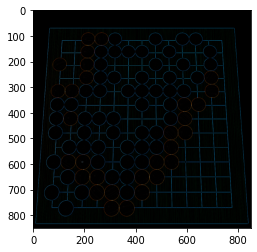

In [18]:
img = cv2.imread('/Users/sejongpyo/downloads/baduk.png')

dst = cv2.Laplacian(img, cv2.CV_8U)

plt.imshow(dst)
plt.show()

### canny edge detection
1. noise 제거 (5x5 gaussian filter)
2. edge gradient detection
- 선과 주변은 벡터값이 급격하게 변하기 때문에 이를 통해 경계값 후보군 선별
3. non-maximum suppression
- 이미지를 스캔하여 edge가 아닌 픽셀 제거
4. hysteresis thresholding
- 판단된 edge가 진짜인지 판별
- max val과 minVal(임계값)을 설정하여 maxVal 이상은 강한 Edge, min과 max사이는 약한 edge로 설정
- 약한 edge가 진짜 edge인지 확인하기 위해서 강한 edge와 연결이 되어 있으면 edge로 판단하고, 그러지 않으면 제거

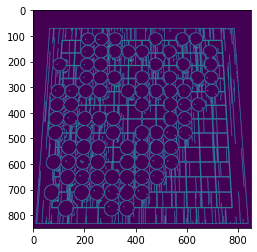

In [22]:
img = cv2.imread('/Users/sejongpyo/downloads/baduk.png')

dst = cv2.Canny(img, 50, 100)

plt.imshow(dst)
plt.show()

### 중요!
1. output datatype에서 cv2.CV_8U 또는 np.uint8임
2. black to white는 양의 경사, white to black은 음의 경사
#### 데이터를 np.uint8로 convert하는 과정에서 음의 경사가 모두 0으로 나타남
- 다시 말해서 경계선을 놓치는것

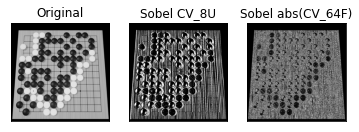

In [23]:
img = cv2.imread('/Users/sejongpyo/downloads/baduk.png', 0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()